In [124]:
# https://platform.olimpiada-ai.ro/en/problems/78

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import folium
from folium.plugins import FastMarkerCluster
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [125]:
data = pd.read_csv("/kaggle/input/public-transportation/public-transportation.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'])

data.shape

(2058806, 5)

In [126]:
data.head()

,id,vehicle_type,latitude,longitude,timestamp
0,64,3,64.8924,16.4665,2025-12-09 19:26:55
1,657,3,64.8934,16.4681,2025-12-09 21:14:25
2,536,3,64.8922,16.4679,2025-12-09 21:08:41
3,216,3,64.8926,16.4661,2025-12-09 20:00:01
4,156,3,64.9084,16.4446,2025-12-09 21:14:37


In [127]:
data['id'].nunique(), data['vehicle_type'].nunique()

(663, 4)

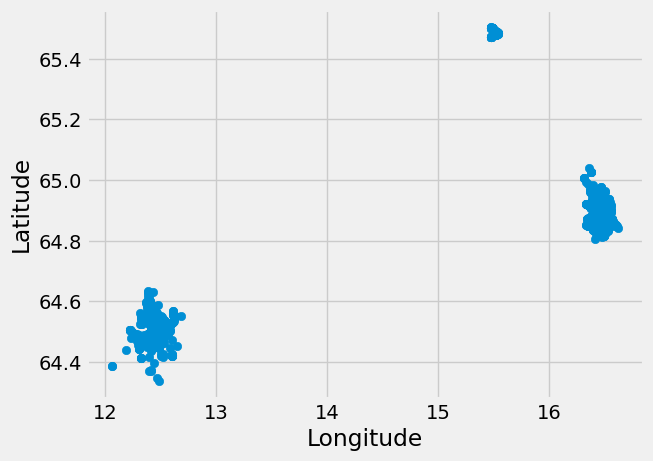

In [128]:
portion = data.sample(10000)

plt.scatter(portion['longitude'], portion['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [129]:
m = folium.Map(location=[65, 14.5], zoom_start=7.45, tiles='cartodbpositron')

points = portion[['latitude', 'longitude']].values.tolist()

FastMarkerCluster(points).add_to(m)

m

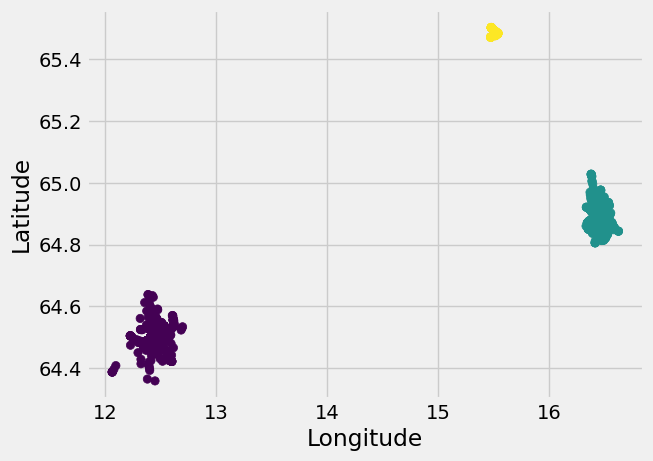

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data[['longitude', 'latitude']])

data['cluster'] = kmeans.labels_

portion = data.sample(10000)

plt.scatter(portion['longitude'], portion['latitude'], c=portion['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [131]:
data.groupby('id').agg(clusters=('cluster', set))

,clusters
id,
0,{0}
1,{0}
2,{0}
3,{0}
4,{0}
...,...
659,{0}
660,{0}
661,{1}


In [132]:
data.groupby('id').agg(clusters=('cluster', set)).astype(str).value_counts()

clusters
{0}         374
{1}         275
{2}          14
Name: count, dtype: int64

In [133]:
night_10_portion = data[(data['vehicle_type']==10) & ((data['timestamp'].dt.hour <= 5) & (data['timestamp'].dt.hour >= 3))]

m = folium.Map(location=[65, 14.5], zoom_start=7.45, tiles='cartodbpositron')

points = night_10_portion[['latitude', 'longitude']].values.tolist()

FastMarkerCluster(points).add_to(m)

m

In [134]:
fig = px.scatter(night_10_portion, x='longitude', y='latitude')

fig.add_scatter(x=[16.433, 16.400, 16.438], y=[64.8623, 64.910, 64.905], mode='markers', marker=dict(size=30, symbol='star'))

fig.update_xaxes(title_text='Longitude')
fig.update_yaxes(title_text='Latitude')

fig.show()

In [135]:
subm = pd.DataFrame({
    'subtaskID': [],
    'Value1': [],
    'Value2': []
})

# subtask 1
subm.loc[len(subm)] = [1, data['id'].nunique(), data['vehicle_type'].nunique()]

# subtask 2
subm = pd.concat([subm, pd.concat([pd.DataFrame([2]*data['id'].nunique(), columns=['subtaskID']), data.groupby('id').agg(clusters=('cluster', 'first')).reset_index()], axis=1).rename(columns={'id': 'Value1', 'clusters': 'Value2'})], axis=0, ignore_index=True)

# subtask 3
subm.loc[len(subm)] = [3, 64.8623, 16.433]
subm.loc[len(subm)] = [3, 64.905, 16.438]
subm.loc[len(subm)] = [3, 64.910, 16.400]

subm.to_csv("submission.csv", index=False)
subm

,subtaskID,Value1,Value2
0,1.0,663.0000,4.000
1,2.0,0.0000,0.000
2,2.0,1.0000,0.000
3,2.0,2.0000,0.000
4,2.0,3.0000,0.000
...,...,...,...
662,2.0,662.0000,1.000
663,2.0,663.0000,0.000
664,3.0,64.8623,16.433
665,3.0,64.9050,16.438
